# Tasks

## Task 6.1: Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.
## NOTE: If the running time is too long, you can reduce the number of samples.
## NOTE: You should comment on your code and explain what each part is doing

In [128]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [129]:
pip install matplotlib seaborn --upgrade


Note: you may need to restart the kernel to use updated packages.


In [15]:
############# WRITE THE CODE IN THIS CELL ####################
import pandas as pd
import numpy as np
import warnings

# this code  filters the warning error but doesn’t have any impact on the dataset 
warnings.filterwarnings('ignore')



In [16]:
df = pd.read_csv('Tweets.csv')
df.head()

,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [17]:
df.shape

(40000, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  int64 
 1   tweet      40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [19]:
df.isna().sum()

sentiment    0
tweet        0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
# Extracting a sample
df = df.sample(n=10000, random_state = 48)
df.reset_index(drop=True, inplace=True)

In [22]:
df

,sentiment,tweet
0,1,Brad Fastings is my favorite person to hang ou...
1,0,"It's not what you said, it's how you said it!"
2,1,Russell invited me to Drayton Manor on Tuesday...
3,0,@TwitItCherish I don't know if she likes the l...
4,1,"Today = Lazy, maybe a gym session. Tomorrow = ..."
...,...,...
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...
9997,1,"@turtlescanrun VERY nice pace, esp. in the hea..."
9998,1,Waiting at broadoak-only two more before us!


In [23]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook

In [24]:
import plotly.express as px


# Create a histogram for the sentiment distribution
fig = px.histogram(df, x='sentiment',
                   title='Sentiment Distribution',  
                   color_discrete_sequence=['turquoise'],  # Setting the bar color
                   category_orders={"sentiment": [0, 1]}  # Ensuring correct order of categories
                  )

# Update trace appearances
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.show()


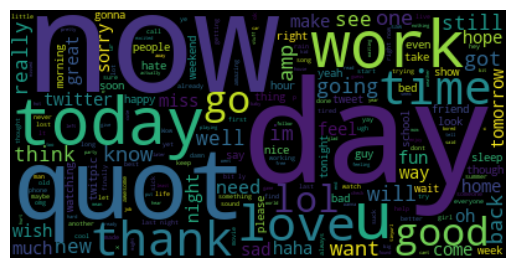

In [25]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df['tweet']) 
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [26]:
# Test the transformation logic on a subset
subset = df.head(100)
subset['sentiment'] = subset['sentiment'].apply(lambda x: 1 if x > 0 else 0)
print(subset['sentiment'].value_counts())


sentiment
1    52
0    48
Name: count, dtype: int64


In [27]:
df

,sentiment,tweet
0,1,Brad Fastings is my favorite person to hang ou...
1,0,"It's not what you said, it's how you said it!"
2,1,Russell invited me to Drayton Manor on Tuesday...
3,0,@TwitItCherish I don't know if she likes the l...
4,1,"Today = Lazy, maybe a gym session. Tomorrow = ..."
...,...,...
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...
9997,1,"@turtlescanrun VERY nice pace, esp. in the hea..."
9998,1,Waiting at broadoak-only two more before us!


In [28]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

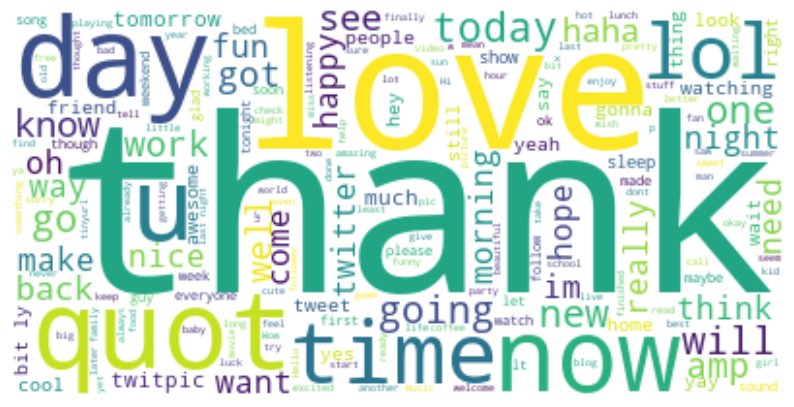

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# here 1 is indicated as positive in the dataset
# Filter out positive sentiments
positive = df[df['sentiment'] == 1]  

# Create a set of stopwords and add custom stopwords
# Exclude common but uninformative words
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "good", "great"])  

#  Concatenate all reviews into one large string
if 'tweet' in positive.columns:
    pos_text = " ".join(review for review in positive['tweet'].dropna())
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)

    # Display the word cloud
    # Set the size of the figure
    plt.figure(figsize=(10, 6))  
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


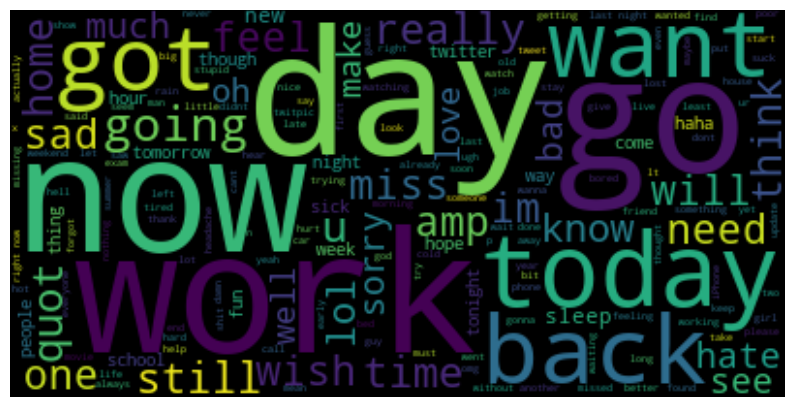

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# here 0 is indicated as negative in the dataset
# Filter out positive sentiments
negative = df[df['sentiment'] == 0]  # Filter out negative sentiments

# Create a set of stopwords and add custom stopwords
# Exclude common but uninformative words
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "good", "great"])  

#  Concatenate all reviews into one large string
if 'tweet' in negative.columns:
    pos_text = " ".join(review for review in negative['tweet'].dropna())  # Concatenate all reviews into one large string
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(pos_text)

  # Display the word cloud
    # Set the size of the figure    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [31]:
import plotly.express as px

# use the mapping to handle both transformations in one step:
df['sentimentt'] = df['sentiment'].map({0: 'negative', 1: 'positive'})

# Check to ensure the mapping has occurred correctly (optional but recommended):
print(df['sentimentt'].value_counts())

# Create a histogram to visualize the distribution of sentiments
fig = px.histogram(df, x='sentimentt',
                   title='Product Sentiment Distribution',
                   color='sentimentt',
                   color_discrete_map={'negative': 'indianred', 'positive': 'turquoise'})

# Update plot aesthetics
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment Distribution')

# Show the histogram, specify the renderer if necessary for your environment
fig.show()


sentimentt
positive    5004
negative    4996
Name: count, dtype: int64


In [33]:
import pandas as pd

# Function to remove punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

# Assuming df is your DataFrame and 'tweet' is the text column
df = df.dropna(subset=['tweet'])  # Drop rows where 'tweet' is NaN before processing
df['tweet'] = df['tweet'].apply(remove_punctuation)


In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Ensure the stopwords are downloaded (good for initial setups)
# nltk.download('stopwords')

# Load stopwords from NLTK
allstopwords = stopwords.words('english')

# Check if the 'tweet' column is in the DataFrame
if 'tweet' in df.columns:
    # Handle NaN values in the tweet column before processing
    df['tweet'] = df['tweet'].fillna("")

    # Remove stopwords from the 'tweet' column
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(word for word in x.split() if word not in allstopwords))


In [35]:
# Extracting input and output
X=df['tweet']
# X=df['Text']
y=df['sentiment']

In [36]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [39]:
# Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [40]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [41]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

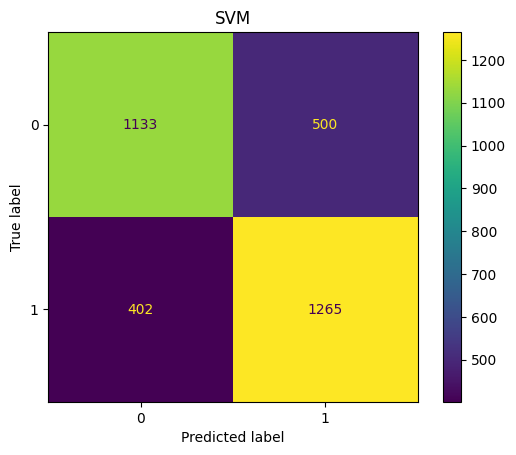

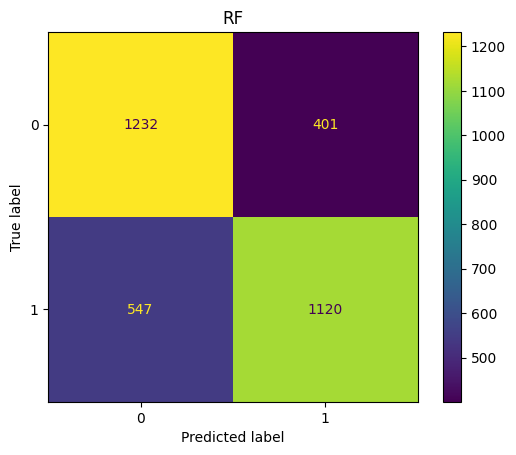

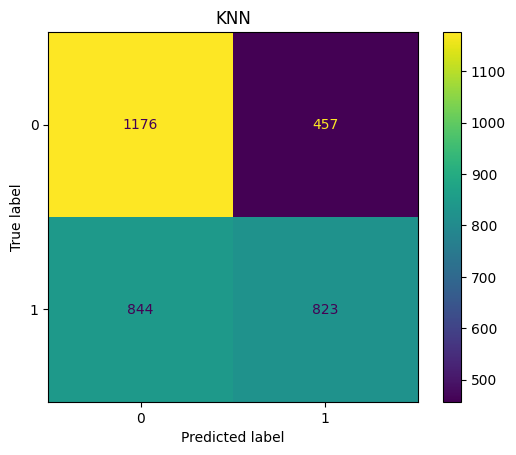

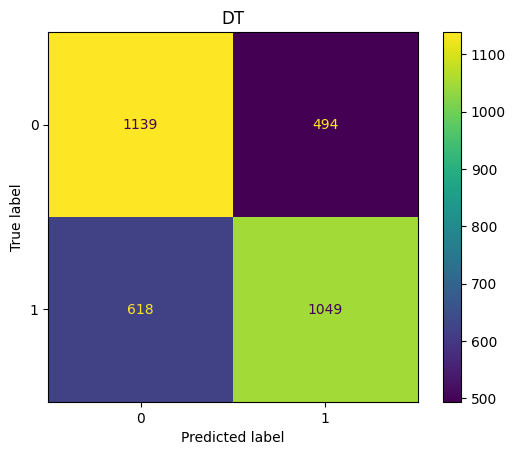

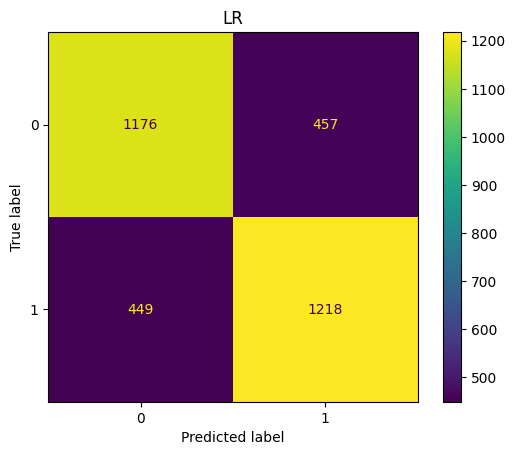

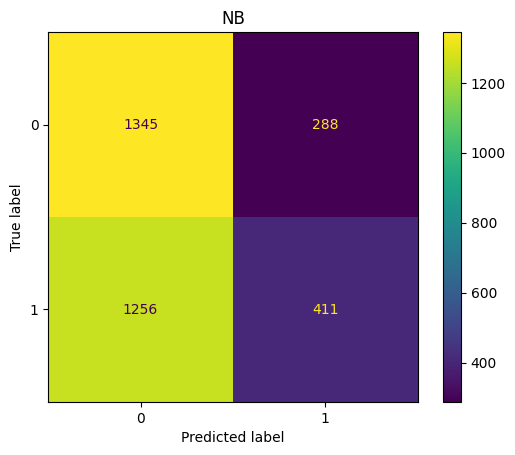

In [43]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("NB")

In [44]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 1265
True Negatives: 1133
False Positives: 500
False Negatives: 402
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.76
Specificity: 0.69
Precision: 0.69
f_1 Score: 0.72



RF metrics

True Positives: 1120
True Negatives: 1232
False Positives: 401
False Negatives: 547
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.67
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.71



KNN metrics

True Positives: 823
True Negatives: 1176
False Positives: 457
False Negatives: 844
--------------------------------------------------
Accuracy: 0.61
Mis-Classification: 0.39
Sensitivity: 0.49
Specificity: 0.72
Precision: 0.72
f_1 Score: 0.59



DT metrics

True Positives: 1049
True Negatives: 1139
False Positives: 494
False Negatives: 618
--------------------------------------------------
Accuracy: 0.66
Mis-Classification: 0.34
Sensitivity: 0.63
Specificity: 0.7
Pre